In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import sys
sys.path.append('$HOME/CoffeeGPU/python')
import os
import toml
from mpl_toolkits.axes_grid1 import make_axes_locatable
from datalib_logsph import Data

In [2]:
import matplotlib
matplotlib.rc('text',usetex=True)
plt.rc('font',**{'family':'serif','serif':['Times'],'size':18})

In [3]:
import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [5]:
datadir='./Data'
data=Data(datadir)

In [6]:
conf=data._conf
print(conf)
dx=conf['size'][0]/conf['N'][0]*conf['downsample']
dy=conf['size'][1]/conf['N'][1]*conf['downsample']
dn1=conf['data_interval']
dt=conf['dt']
nmax=conf['max_steps']//dn1
print(nmax)
T0=conf['tp_start']
T=conf['tp_end']-T0
b0=conf['b0']

{'dt': 0.001, 'max_steps': 100000, 'data_interval': 500, 'snapshot_interval': 10000, 'periodic_boundary': [False, False, False], 'N': [3840, 2048, 1], 'guard': [5, 5, 0], 'lower': [-0.2, 0.0, 0.0], 'size': [5.7, 3.141592653589793, 0.0], 'nodes': [1, 1, 1], 'shift_ghost': 0, 'downsample': 2, 'a': 0.9, 'calc_current': True, 'clean_ep': True, 'check_egb': True, 'use_edotb_damping': False, 'pml': [0, 0, 0], 'pmllen': 1, 'sigpml': 10.0, 'divB_clean': True, 'ch2': 1.0, 'tau': 2.0, 'KOeps': 0.05, 'KO_geometry': False, 'problem': 2, 'radius': 1.0, 'omega': 0.0, 'b0': 1000.0, 'tp_start': 0.0, 'tp_end': 10.0, 'thp1': 0.2, 'thp2': 0.4, 'dw0': 0.4, 'nT': 4.0, 'pert_type': 2}
200


In [7]:
def plot2d1(xcoord,ycoord,u,Aph,levels=[],Rmin=0,Rmax=25,vmin=-0.1,vmax=0.1,name1='',cmap='jet',
            cnorm='linear',star=True,**kwargs):
    fig=plt.figure(figsize=(6,10))
    ax=fig.add_subplot(111)
    index=np.argmin(np.fabs(data.r-1.5*Rmax))
    norm=matplotlib.colors.Normalize(vmin=vmin,vmax=vmax)
    if cnorm=='log':
        norm=matplotlib.colors.LogNorm(vmin=vmin,vmax=vmax)
    step=2
    im=plt.pcolormesh(xcoord[:,0:index:step],ycoord[:,0:index:step],u[:,0:index:step],
                      cmap=cmap,norm=norm,shading='gouraud')
#     im=plt.pcolormesh(xcoord[:,0:index:step],ycoord[:,0:index:step],u[:,0:index:step],
#                       cmap=cmap,norm=norm)
    plt.contour(xcoord,ycoord,Aph,levels=levels,**kwargs)
    ax.set_xlim([Rmin,Rmax])
    ax.set_ylim([-(Rmax-Rmin),(Rmax-Rmin)])
    ax.set_aspect('equal')
    plt.xlabel("R")
    plt.ylabel("z")
    if star:
        circle = plt.Circle((0, 0), conf['radius'], ec='k',fill=False)
        ax.add_artist(circle)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.title(name1)
    plt.tight_layout()
    return ax

In [8]:
levels=np.linspace(0,0.2*np.amax(data.flux),20)

In [9]:
import matplotlib.colors as mcolors
# sample the colormaps that you want to use. Use 128 from each so we get 256
# colors in total
colors1 = plt.cm.viridis(np.linspace(0, 1, 128))
colors2 = plt.cm.gist_heat(np.linspace(0, 1, 128))
# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

## Slices of the electric field

### n=60

In [10]:
n=60
data.load(n)
t=n*conf['dt']*conf['data_interval']
print(t)
B2=data.Br**2+data.Bth**2+data.Bph**2
B=np.sqrt(B2)
E2=data.Er**2+data.Eth**2+data.Eph**2
E=np.sqrt(E2)

30.0


In [ ]:
plot2d1(data.x1,data.x2,E/B,data.flux,levels=levels,vmin=0,vmax=2,
        name1=r'$E/B$',Rmax=40,cmap=mymap,colors='k',linewidths=0.5)
plt.show()

In [ ]:
plot2d1(data.x1,data.x2,E/B-1e-4,data.flux,levels=levels,vmin=0,vmax=2,
        name1=r'$E/B$',Rmax=40,cmap=mymap,colors='k',linewidths=0.5)
plt.show()

In [ ]:
plot2d1(data.x1,data.x2,E/B-1e-3,data.flux,levels=levels,vmin=0,vmax=2,
        name1=r'$E/B$',Rmax=40,cmap=mymap,colors='k',linewidths=0.5)
plt.show()

In [ ]:
plot2d1(data.x1,data.x2,data.dU_KO*data.rv**2/b0**2,data.flux,levels=levels,vmin=1e-10,vmax=1,
        name1=r'$\Delta U_{\rm KO}$',Rmax=40,cmap='inferno',cnorm='log',colors='k',linewidths=0.5)
plt.show()

In [ ]:
plot2d1(data.x1,data.x2,data.dU_EgtB*data.rv**2/b0**2,data.flux,levels=levels,vmin=1e-10,vmax=1,
        name1=r'$\Delta U_{E>B}$',Rmax=40,cmap='inferno',cnorm='log',colors='k',linewidths=0.5)
plt.show()

In [ ]:
plot2d1(data.x1,data.x2,data.dU_EgtB*data.rv**2/b0**2,data.flux,levels=levels,vmin=0,vmax=1e-9,
        name1=r'$\Delta U_{E>B}$',Rmax=40,cmap='inferno',cnorm='linear',colors='k',linewidths=0.5)
plt.show()

In [ ]:
print(data.dU_EgtB)

In [ ]:
print(data.dU_KO)

In [ ]:
print(np.amax(data.dU_KO))

In [ ]:
print(np.amax(data.dU_EgtB))

In [ ]:
print(np.amax(data.dU_Epar))

In [ ]:
print(np.amax(data.dU_EgtB[1:]))

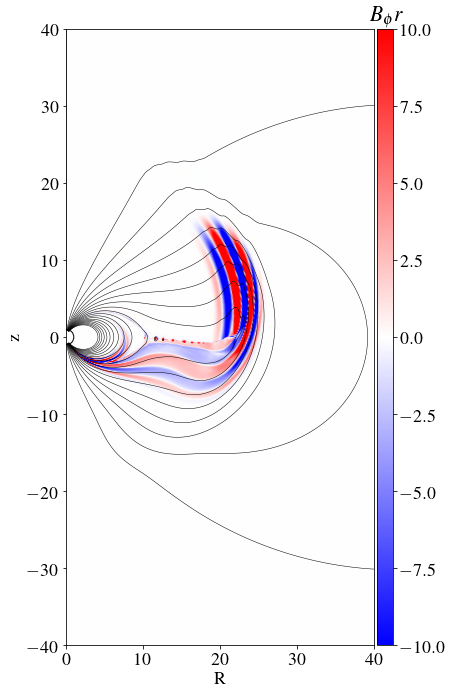

In [11]:
vlim=10
plot2d1(data.x1,data.x2,data.Bph*data.r,data.flux,levels=levels,vmin=-vlim,vmax=vlim,
        name1=r'$B_{\phi}r$',Rmax=40,cmap='bwr',colors='k',linewidths=0.5)
plt.show()

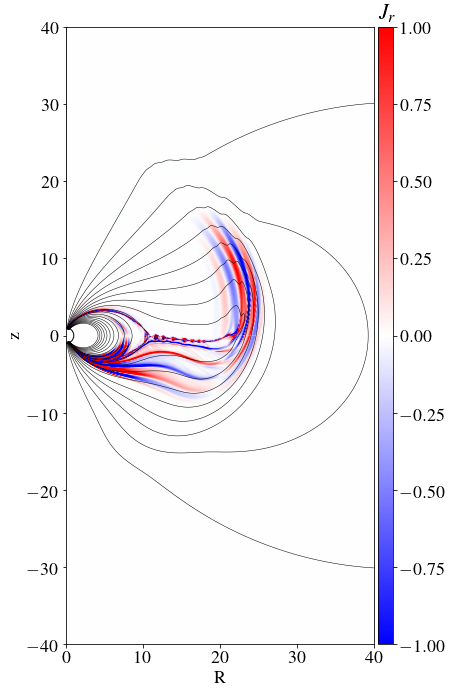

In [12]:
vlim=1
plot2d1(data.x1,data.x2,data.Jr,data.flux,levels=levels,vmin=-vlim,vmax=vlim,
        name1=r'$J_r$',Rmax=40,cmap='bwr',colors='k',linewidths=0.5)
plt.show()

### n=5

In [ ]:
n=5
data.load(n)
t=n*conf['dt']*conf['data_interval']
print(t)
B2=data.Br**2+data.Bth**2+data.Bph**2
B=np.sqrt(B2)
E2=data.Er**2+data.Eth**2+data.Eph**2
E=np.sqrt(E2)

In [ ]:
plot2d1(data.x1,data.x2,data.Eph,data.flux,levels=levels,vmin=-1,vmax=1,
        name1=r'$E_{\phi}$',Rmax=t,cmap='bwr',colors='k',linewidths=0.5)
plt.show()

In [ ]:
plot2d1(data.x1,data.x2,data.dU_KO*data.rv**2/b0**2,data.flux,levels=levels,vmin=1e-6,vmax=1,
        name1=r'$\Delta U_{\rm KO}r^2$',Rmax=t,cmap='inferno',cnorm='log',star=False,colors='k',linewidths=0.5)
plt.show()

In [ ]:
ith=np.argmin(np.fabs(data.theta-0.3))
plt.plot(data.r,data.Eph[ith,:])
plt.xlim(0.5,2)
plt.show()

In [ ]:
plt.plot(data.theta,data.Eph[:,5])
plt.xlim(0,1)
plt.show()

In [ ]:
ith=np.argmin(np.fabs(data.theta-0.3))
plt.plot(data.r,data.Eph[ith,:]*data.r**2)
plt.xlim(0.5,2)
plt.show()

### n=10

In [ ]:
n=10
data.load(n)
t=n*conf['dt']*conf['data_interval']
print(t)
B2=data.Br**2+data.Bth**2+data.Bph**2
B=np.sqrt(B2)
E2=data.Er**2+data.Eth**2+data.Eph**2
E=np.sqrt(E2)

In [ ]:
plot2d1(data.x1,data.x2,data.Eph,data.flux,levels=levels,vmin=-1,vmax=1,
        name1=r'$E_{\phi}$',Rmax=t,cmap='bwr',colors='k',linewidths=0.5)
plt.show()

In [ ]:
plot2d1(data.x1,data.x2,data.Eph*data.rv,data.flux,levels=levels,vmin=-1,vmax=1,
        name1=r'$E_{\phi}r$',Rmax=t,cmap='bwr',colors='k',linewidths=0.5)
plt.show()

In [ ]:
plot2d1(data.x1,data.x2,data.Eph*data.rv**2,data.flux,levels=levels,vmin=-10,vmax=10,
        name1=r'$E_{\phi}r^2$',Rmax=t,cmap='bwr',colors='k',linewidths=0.5)
plt.show()

In [ ]:
plot2d1(data.x1,data.x2,data.dU_KO*data.rv**2/b0**2,data.flux,levels=levels,vmin=1e-6,vmax=1,
        name1=r'$\Delta U_{\rm KO}r^2$',Rmax=t,cmap='inferno',cnorm='log',star=False,colors='k',linewidths=0.5)
plt.show()

In [ ]:
ith=np.argmin(np.fabs(data.theta-0.3))
plt.plot(data.r,data.Eph[ith,:])
plt.xlim(0.5,2)
plt.show()

In [ ]:
ith=np.argmin(np.fabs(data.theta-0.3))
plt.plot(data.r,data.Eph[ith,:]*data.r**2)
plt.xlim(0.5,2)
plt.show()

### n=15

In [ ]:
n=15
data.load(n)
t=n*conf['dt']*conf['data_interval']
print(t)
B2=data.Br**2+data.Bth**2+data.Bph**2
B=np.sqrt(B2)
E2=data.Er**2+data.Eth**2+data.Eph**2
E=np.sqrt(E2)

In [ ]:
plot2d1(data.x1,data.x2,data.Eph,data.flux,levels=levels,vmin=-1,vmax=1,
        name1=r'$E_{\phi}$',Rmax=t,cmap='bwr',colors='k',linewidths=0.5)
plt.show()

In [ ]:
plot2d1(data.x1,data.x2,data.Eph,data.flux,levels=levels,vmin=-1,vmax=1,
        name1=r'$E_{\phi}$',Rmax=5,cmap='bwr',colors='k',linewidths=0.5)
plt.show()

In [ ]:
plot2d1(data.x1,data.x2,data.dU_KO*data.rv**2/b0**2,data.flux,levels=levels,vmin=1e-6,vmax=10,
        name1=r'$\Delta U_{\rm KO}r^2$',Rmax=t,cmap='inferno',cnorm='log',star=False,colors='k',linewidths=0.5)
plt.show()

In [ ]:
ith=np.argmin(np.fabs(data.theta-0.3))
plt.plot(data.r,data.Eph[ith,:])
plt.xlim(0.5,2)
plt.show()

In [ ]:
ith=np.argmin(np.fabs(data.theta-0.3))
plt.plot(data.r,data.Eph[ith,:]*data.r**2)
plt.xlim(0.5,2)
plt.show()

### n=20

In [ ]:
n=20
data.load(n)
t=n*conf['dt']*conf['data_interval']
print(t)
B2=data.Br**2+data.Bth**2+data.Bph**2
B=np.sqrt(B2)
E2=data.Er**2+data.Eth**2+data.Eph**2
E=np.sqrt(E2)

In [ ]:
plot2d1(data.x1,data.x2,data.Eph,data.flux,levels=levels,vmin=-1,vmax=1,
        name1=r'$E_{\phi}$',Rmax=t,cmap='bwr',colors='k',linewidths=0.5)
plt.show()

In [ ]:
plot2d1(data.x1,data.x2,data.Eph,data.flux,levels=levels,vmin=-1,vmax=1,
        name1=r'$E_{\phi}$',Rmax=2,cmap='bwr',colors='k',linewidths=0.5)
plt.show()

In [ ]:
plot2d1(data.x1,data.x2,data.dU_KO*data.rv**2/b0**2,data.flux,levels=levels,vmin=1e-6,vmax=10,
        name1=r'$\Delta U_{\rm KO}r^2$',Rmax=t,cmap='inferno',cnorm='log',star=False,colors='k',linewidths=0.5)
plt.show()

In [ ]:
ith=np.argmin(np.fabs(data.theta-0.3))
plt.plot(data.r,data.Eph[ith,:])
plt.xlim(0.5,2)
plt.show()

In [ ]:
ith=np.argmin(np.fabs(data.theta-0.3))
plt.plot(data.r,data.Eph[ith,:]*data.r**2)
plt.xlim(0.5,2)
plt.show()

In [ ]:
plot2d1(data.x1,data.x2,data.Er,data.flux,levels=levels,vmin=-1,vmax=1,
        name1=r'$E_{r}$',Rmax=2,cmap='bwr',colors='k',linewidths=0.5)
plt.show()

In [ ]:
plot2d1(data.x1,data.x2,data.Eth,data.flux,levels=levels,vmin=-1,vmax=1,
        name1=r'$E_{\theta}$',Rmax=2,cmap='bwr',colors='k',linewidths=0.5)
plt.show()

### n=30

In [ ]:
n=30
data.load(n)
t=n*conf['dt']*conf['data_interval']
print(t)
B2=data.Br**2+data.Bth**2+data.Bph**2
B=np.sqrt(B2)
E2=data.Er**2+data.Eth**2+data.Eph**2
E=np.sqrt(E2)

In [ ]:
plot2d1(data.x1,data.x2,data.Eph,data.flux,levels=levels,vmin=-1,vmax=1,
        name1=r'$E_{\phi}$',Rmax=t,cmap='bwr',colors='k',linewidths=0.5)
plt.show()

In [ ]:
plot2d1(data.x1,data.x2,data.Eph,data.flux,levels=levels,vmin=-1,vmax=1,
        name1=r'$E_{\phi}$',Rmax=2,cmap='bwr',colors='k',linewidths=0.5)
plt.show()

In [ ]:
plot2d1(data.x1,data.x2,data.dU_KO*data.rv**2/b0**2,data.flux,levels=levels,vmin=1e-6,vmax=10,
        name1=r'$\Delta U_{\rm KO}r^2$',Rmax=t,cmap='inferno',cnorm='log',star=False,colors='k',linewidths=0.5)
plt.show()

## Total energy in the field

Progress: [####################] 100.0%


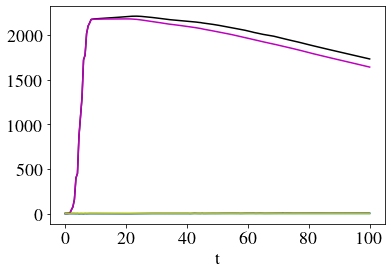

In [10]:
f2=os.path.join(datadir,'energy-diss.txt')
# rmax=np.exp(conf['size'][0]-conf['pml'][0]*dx/conf['downsample']*2-3*dx)
# index1=(data.rv>1)&(data.rv<rmax)
# index=(data.rv>10)&(data.rv<rmax)&(data.thetav>dy)&(data.thetav<np.pi-dy)
index=(data.rv>conf['radius'])&(data.thetav>=dy)&(data.thetav<=np.pi-dy)
B02=data.Br0**2+data.Bth0**2+data.Bph0**2
E02=data.Er0**2+data.Eth0**2+data.Eph0**2
W0=np.sum(((B02+E02)/2.0*data.rv**3*np.sin(data.thetav))[index])*dx*dy
if not os.path.exists(f2):
# if True:
    W=np.array([])
    dW=np.array([])
    diss_KO=np.array([])
    diss_EgtB=np.array([])
    diss_Epar=np.array([])
    t0=np.array([])
    N=nmax
    for i in range(0,N+1):
        data.load(i)
        
        t=i*conf['data_interval']*conf['dt']
        t0=np.append(t0,t)
        
        tmp=np.sum((data.U*data.rv**3*np.sin(data.thetav))[index])*dx*dy
        W=np.append(W,tmp-W0)
        tmp=np.sum(((data.dBr**2+data.dBth**2+data.dBph**2+data.dEr**2+data.dEth**2+data.dEph**2)/2.0
                  *data.rv**3*np.sin(data.thetav))[index])*dx*dy
        dW=np.append(dW,tmp)
        tmp=np.sum((-data.dU_KO_cum/2.0*data.rv**3*np.sin(data.thetav))[index])*dx*dy
        diss_KO=np.append(diss_KO,tmp)
        tmp=np.sum((-data.dU_EgtB_cum/2.0*data.rv**3*np.sin(data.thetav))[index])*dx*dy
        diss_EgtB=np.append(diss_EgtB,tmp)
        tmp=np.sum((-data.dU_Epar_cum/2.0*data.rv**3*np.sin(data.thetav))[index])*dx*dy
        diss_Epar=np.append(diss_Epar,tmp)
        update_progress(i/N)
        
    np.savetxt(f2,np.column_stack((t0,W,dW,diss_KO,diss_EgtB,diss_Epar)))
else:
    data1=np.loadtxt(f2)
    t0=data1[:,0]
    W=data1[:,1]
    dW=data1[:,2]
    diss_KO=data1[:,3]
    diss_EgtB=data1[:,4]
    diss_Epar=data1[:,5]


fig=plt.figure(figsize=(6,4))
plt.plot(t0,W,'-k')
plt.plot(t0,dW,'-m')
plt.plot(t0,diss_KO,'-b')
plt.plot(t0,diss_EgtB,'-c')
plt.plot(t0,diss_Epar,'-y')
plt.xlabel('t')
plt.show()

In [ ]:
fig=plt.figure(figsize=(6,4))
plt.plot(t0,W,'-k')
plt.plot(t0,dW,'-m')
plt.plot(t0,diss_KO,'-b')
plt.plot(t0,diss_EgtB,'-c')
plt.plot(t0,diss_Epar,'-y')
plt.xlabel('t')
plt.ylim(-100,200)
plt.show()